# Greetings traveller! 

Welcome to Week 1 of the AIAP coursework. In the next 6 weeks, you will be *travelling* through the machine learning space, where we will be looking at various different machine learning problems and how to solve them. We will be taking a quick sweep through the many areas of analytics and machine learning, including learning about learning from data itself.

For some, this may be a revision of previously learned concepts. In that case we would advice you to take this opportunity to refresh yourself and find clarity in areas you may have previously sped past. For others, many areas will be new, and we would advice you to take your time, and build your fundamentals well, as they will pay off in the long term.

Our course is designed to train commandos in the machine learning space - people who can not only do statistical modelling and learning, but also learn to work with data, and in the process write high quality, collaboration-focused or production-geared code. Different individuals may find different areas challenging; as such, do ask questions and help each other out when necessary.

This is not a course for pure beginners. Some basic areas will not be touched upon in the class, and we will initially highlight them with <font color=red>red</font> text. We are not saying that 100% of the participants know these concepts with 100% confidence. Feel free to approach a peer or any of us if you require assistance, especially specialised technical assistance.  
  
 <font color=red>Pre-requisite: you should know how to use Jupyter notebooks!</font>

Now, let's get into week one of the course! __Good luck, have fun.__

# 1. Initial Modelling 

Our problem this week is the el classico: the Titanic dataset, a dataset probably done to death by fellow travellers of the machine learning space. There is a reason why this dataset is so popular - it demands for all the fundamentals required of statistical modelling, while staying light in terms of technical demands. With just 891 rows of data, the problem can be solved on any laptop. While your laptop would not face much stress this week, we would recommend you to consider your technical set-up, so that as heavier datasets come about (in the size of GBs), you will not be limited by them.
<font color=red>Pre-requisite: you should know that this is a classification problem.</font>

First, go grab the data. The data is available at https://www.kaggle.com/c/titanic/data, you will need to register an account to retrieve it.

Since we are talking about downloading data, we should take this time to set up your folder. One such way (our recommended way) to do it as to create a project folder, then leave your notebooks in the root of that folder. Your code base, which we will be starting to build over time, should be in a `src` subfolder, while your data should be in a `data` folder, with a tree structure as shown:

```
aiap
 |- src
 |- data
 |   |- titanic.csv
 |   |- titanic_test.csv
 |- titanic.ipynb
```

This is an opinionated format - we suggest this only for simplicity reasons. For discussion on this, you may visit the below resources [Jeanne to advise]:
- Software Carpentry
- Jenny Bryan's stuff

Now, we are ready to do some coding work. First, import the necessary libraries you need - tools like `np`, `pd`, `plt` and your `sklearn` libraries.
<font color=red>Checkpoint: you should know what and how to import your required resources.</font>

In [25]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Import your data. Using the `train_test_split` method, reserve some validation data for evaluation use.
<font color=red>Checkpoint: you should know why and how to create a basic validation dataset (hint: `sklearn.model_selection`).</font>

In [48]:
titanic = pd.read_csv('data/titanic.csv')

## Initial Description 

You may see an accuracy of below 75% - this does not mean anything substantially, but it lets us know that a no-value-add approach to modelling will already generate this accuracy for us. Hence, our goal is to improve upon this current score, and reach as high as possible.

If you were to look at the leaderboards, you will see that accuracy scores go as high as 90+%. Truth be told, we don't think all of these scores are legitimate. The names of survivors are publicly available, so someone might have filled up an excel sheet and submitted it. Nevertheless, we should know that a score of ~90% is perhaps possible.

Consideration: what is the metric we are to evaluate our accuracy?

In [49]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Davidson, Mr. Thornton",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [50]:
titanic[titanic.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [51]:
titanic.Embarked = titanic.Embarked.fillna('S')

In [52]:
titanic.Age = titanic.Age.fillna(titanic.Age.mean())

In [53]:
titanic = titanic.drop('Cabin', axis=1)

In [54]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,NaN,"Davidson, Mr. Thornton",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,646
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.002015,1.102743,0.806057,NaN,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,29.699118,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN


In [41]:
titanic_noname_noticket = titanic.drop(['Name', 'Ticket'], axis=1)

In [42]:
titanic_dummies = pd.get_dummies(titanic_noname_noticket)
titanic_dummies.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [43]:
X_train, X_test, y_train, y_test = train_test_split(titanic_dummies[titanic_dummies.columns.drop('Survived')], titanic_dummies['Survived'])

Train a stock model (with no custom parameters and report the accuracy score).

In [44]:
rf_initial = RandomForestClassifier()
rf_initial.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
rf_initial.score(X_test, y_test)

0.8161434977578476

Depending on the variables you had to drop or clean, as well as how you did your model evaluation, your result should be approximately 75-85%. That's good enough for us to proceed.

# 2. Exploring the data 

Conduct some initial exploration of this data. This could be through dataset level plots, correlation charts and table describes, as well as by understanding what kind of information is available, or not available (i.e. missing). Write a paragraph on what you observe in the data. There is no correct answer, but do present useful and insightful information as much as possible.

This part of the notebook should be helpful to someone who is trying to come into your project, but has no knowledge of the data. Given that this is an easy dataset, this section will not be very challenging, but in complex, real-world problems, this section may take months in an iterative manner.
<font color=red>Checkpoint: you should know how to manipulate, transform and plot interesting informaiton.</font>

In [58]:
titanic_raw = pd.read_csv('data/titanic.csv')

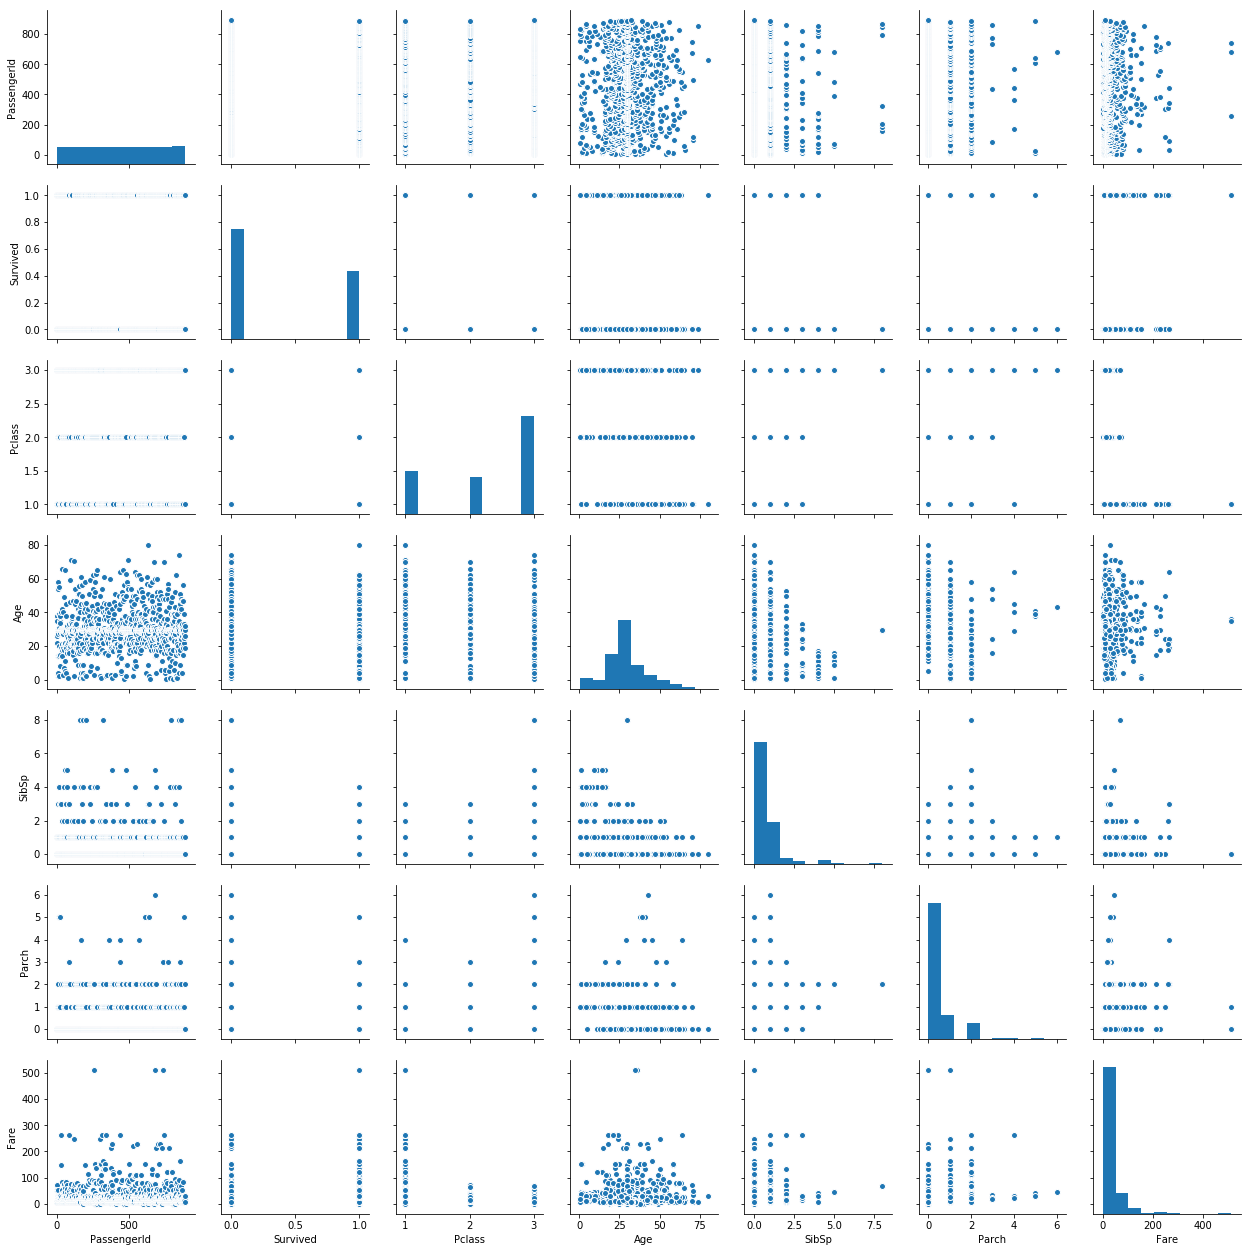

In [55]:
sns.pairplot(titanic)

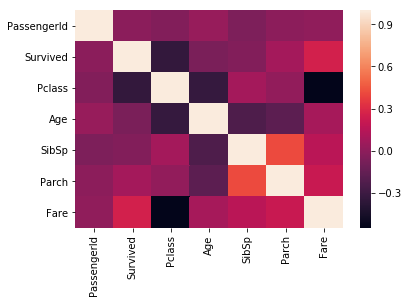

In [56]:
sns.heatmap(titanic.corr())

In [59]:
titanic_raw.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Davidson, Mr. Thornton",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [60]:
titanic_raw.isna().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Not much can be seen from the correlation plots, though the histograms do show that most of the people did not survive, most people were pretty young (mode about 30), and most people don't have siblings. Most people are in class 3, and most people have cheap fares. Correlation wise, class, age and survival are quite strongly negatively correlated. Fare and survival are correlated. 

Tickets are fragmented in terms of labels, and same for Cabin. In fact, since 70% of cabin rows are NA, I'm not sure if I will keep this column at all. Embarked only has 2 NAs, and other columns are pretty good.

Either we will need to do some modifications to Cabin, or we might want to turn it into a ordinal variable and leave NA's as 0. Same for names - we have 891 unique names, as expected.

## Individual Variables 

Now, we go deeper into individual variables. For each variable, provide 1 or more plots, tables or descriptions that best capture the nuance of that column. There is once again no correct answer, but there is a gold standard.

Samples of this can be found in Kaggle's kernels page. While we value pretty charts, we value insights much more. Where insightful information is found, please indicate them in your notebook for your reader.

### PassengerId

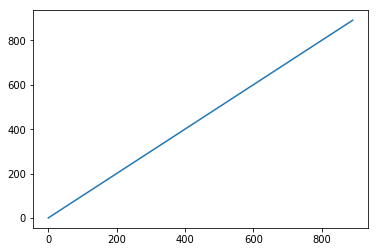

In [62]:
titanic.PassengerId.plot()

An ID variable, which will probably have no impact on the data. However, we should leave it inside and let the model determine if the variable matters, and if it does, try to understand how it helps.

### Survived

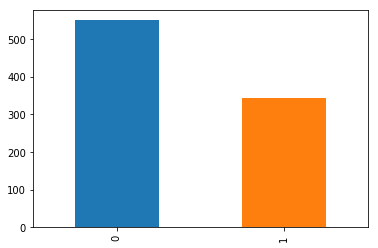

In [63]:
titanic.Survived.value_counts().plot.bar()

Considering that some 62% of people died, our naive model would have already predicted 62% accuracy.

### Pclass

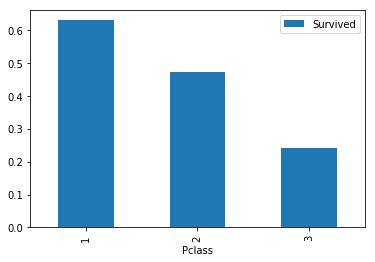

In [64]:
titanic.groupby('Pclass')[['Survived']].mean().plot.bar()

In [65]:
titanic.groupby('Pclass')[['Survived']].count()

,Survived
Pclass,
1,216
2,184
3,491


Pclass=3 (491) has a low chance of survival of 25%, while Pclass=1 (216) is super high >60%.

### Name

In [66]:
titanic.Name.sample(20)

3       Futrelle, Mrs. Jacques Heath (Lily May Peel)
324                         Sage, Mr. George John Jr
540                          Crosby, Miss. Harriet R
789                         Guggenheim, Mr. Benjamin
879    Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)
185                            Rood, Mr. Hugh Roscoe
128                                Peter, Miss. Anna
832                                   Saad, Mr. Amin
228                        Fahlstrom, Mr. Arne Jonas
376                  Landergren, Miss. Aurora Adelia
141                         Nysten, Miss. Anna Sofia
260                                Smith, Mr. Thomas
647              Simonius-Blumer, Col. Oberst Alfons
784                                 Ali, Mr. William
601                             Slabenoff, Mr. Petco
149                Byles, Rev. Thomas Roussel Davids
845                              Abbing, Mr. Anthony
859                                 Razi, Mr. Raihed
746                      Abbott, Mr. Rossmore 

While we know that names are 100% unique - 891 counts of unique names in 891 rows of data, which is to be expected, we can also suspect that people may belong to a family, so some people have the last surname.

In [67]:
titanic['lastname'] = titanic.Name.map(lambda x: x.split(',')[0])
titanic.lastname.value_counts()[:10]

Andersson    9
Sage         7
Carter       6
Johnson      6
Goodwin      6
Panula       6
Skoog        6
Rice         5
Palsson      4
Harris       4
Name: lastname, dtype: int64

In [68]:
titanic[titanic['lastname'] == 'Andersson']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,lastname
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,S,Andersson
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,S,Andersson
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,S,Andersson
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,S,Andersson
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,S,Andersson
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,S,Andersson
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,S,Andersson
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,S,Andersson
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,S,Andersson


Out of everyone in the Andersson family, only those with 7.925 ticket fares survived - they were 17 and 27 years old respectively. In fact, "Wennerstrom" seems to not be with the rest of the family - as an individual person, he was able to survive, while only the eldest teenage girl from the large family of 7 survived.

### Sex

        Survived
Sex             
female       314
male         577


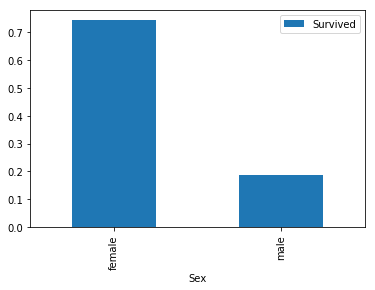

In [69]:
print(titanic.groupby('Sex')[['Survived']].count())
titanic.groupby('Sex')[['Survived']].mean().plot.bar();

Females are disproportionately more likely to survive - >70% of the 314 females survived, while <20% of the 577 males survived.

### Age

In [70]:
titanic[['Survived', 'Age']].dropna().groupby('Survived').mean()

,Age
Survived,
0,30.415100
1,28.549778


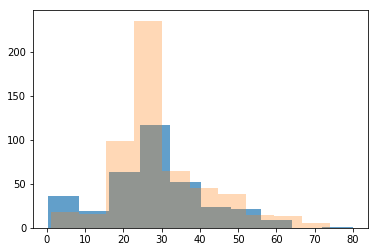

In [71]:
valid_ages = titanic[['Survived', 'Age']].dropna()
fig, ax = plt.subplots(1, 1)
ax.hist(valid_ages[valid_ages.Survived == 1].Age, alpha=0.7);
ax.hist(valid_ages[valid_ages.Survived == 0].Age, alpha=0.3);
plt.show()

It looks like the shape both groups (survive vs did not survive) is rather similar, with not survived having more height as only a minority survived. However, we can also see that at certain age groups, they are equal, but at other age groups, one is much more than other (e.g. 0-10).

### SibSp

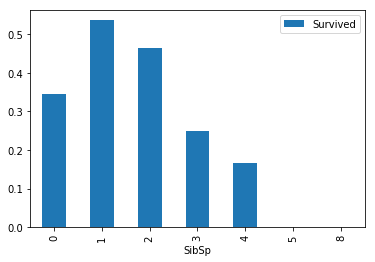

In [72]:
titanic.groupby('SibSp')[['Survived']].mean().plot.bar()

It seens that as the number of siblings/spouses increase, the likelihood of survival decreases. This could have many explanations - that each family were given a quota for example, or that females/children were allowed first. One explanation for SibSp=0 to have a low rate is that these are young men, and hence are given less priority. Regardless, this is a clear observation.

### Parch

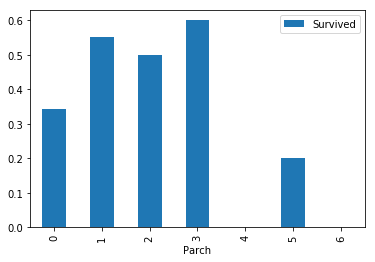

In [73]:
titanic.groupby('Parch')[['Survived']].mean().plot.bar();

???

### Ticket

In [74]:
np.unique(titanic.Ticket.values)

array(['110152', '110413', '110465', '110564', '110813', '111240',
       '111320', '111361', '111369', '111426', '111427', '111428',
       '112050', '112052', '112053', '112058', '112059', '112277',
       '112379', '113028', '113043', '113050', '113051', '113055',
       '113056', '113059', '113501', '113503', '113505', '113509',
       '113510', '113514', '113572', '113760', '113767', '113773',
       '113776', '113781', '113783', '113784', '113786', '113787',
       '113788', '113789', '113792', '113794', '113796', '113798',
       '113800', '113803', '113804', '113806', '113807', '11668', '11751',
       '11752', '11753', '11755', '11765', '11767', '11769', '11771',
       '11774', '11813', '11967', '12233', '12460', '12749', '13049',
       '13213', '13214', '13502', '13507', '13509', '13567', '13568',
       '14311', '14312', '14313', '14973', '1601', '16966', '16988',
       '17421', '17453', '17463', '17464', '17465', '17466', '17474',
       '17764', '19877', '19928', '19943

There are way too many combinations of this, though we could do some feature engineering on for example the first 2 characters, the number of characters, the digits at the back, and the complete prefix. This will be done if feature engineering is required.

### Fare

Fare_bin
(-0.001, 7.55]        92
(7.55, 7.854]         87
(7.854, 8.05]        106
(8.05, 10.5]          78
(10.5, 14.454]        84
(14.454, 21.679]      88
(21.679, 27.0]        89
(27.0, 39.688]        91
(39.688, 77.958]      89
(77.958, 512.329]     87
dtype: int64


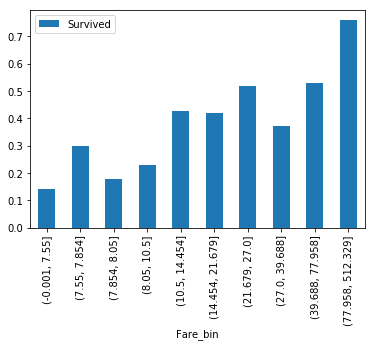

In [75]:
titanic['Fare_bin'] = pd.qcut(titanic.Fare, 10)
print(titanic.groupby('Fare_bin').size())
titanic.groupby('Fare_bin')[['Survived']].mean().plot.bar();

### Cabin

In [80]:
np.unique(titanic_raw.Cabin.dropna().values)

array(['A10', 'A14', 'A16', 'A19', 'A20', 'A23', 'A24', 'A26', 'A31',
       'A32', 'A34', 'A36', 'A5', 'A6', 'A7', 'B101', 'B102', 'B18',
       'B19', 'B20', 'B22', 'B28', 'B3', 'B30', 'B35', 'B37', 'B38',
       'B39', 'B4', 'B41', 'B42', 'B49', 'B5', 'B50', 'B51 B53 B55',
       'B57 B59 B63 B66', 'B58 B60', 'B69', 'B71', 'B73', 'B77', 'B78',
       'B79', 'B80', 'B82 B84', 'B86', 'B94', 'B96 B98', 'C101', 'C103',
       'C104', 'C106', 'C110', 'C111', 'C118', 'C123', 'C124', 'C125',
       'C126', 'C128', 'C148', 'C2', 'C22 C26', 'C23 C25 C27', 'C30',
       'C32', 'C45', 'C46', 'C47', 'C49', 'C50', 'C52', 'C54', 'C62 C64',
       'C65', 'C68', 'C7', 'C70', 'C78', 'C82', 'C83', 'C85', 'C86',
       'C87', 'C90', 'C91', 'C92', 'C93', 'C95', 'C99', 'D', 'D10 D12',
       'D11', 'D15', 'D17', 'D19', 'D20', 'D21', 'D26', 'D28', 'D30',
       'D33', 'D35', 'D36', 'D37', 'D45', 'D46', 'D47', 'D48', 'D49',
       'D50', 'D56', 'D6', 'D7', 'D9', 'E10', 'E101', 'E12', 'E121',
       'E17',

Cabin_char
A    15
B    47
C    59
D    33
E    32
F    13
G     4
T     1
dtype: int64


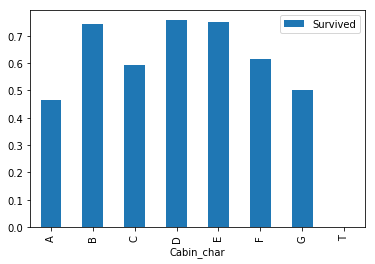

In [83]:
titanic_raw['Cabin_char'] = titanic_raw.Cabin.str[:1]
print(titanic_raw[['Survived', 'Cabin_char']].dropna().groupby('Cabin_char').size())
titanic_raw[['Survived', 'Cabin_char']].dropna().groupby('Cabin_char').mean().plot.bar();

Cabin_num
33            7
6             6
2             5
20            5
49            5
101           5
23 C25 C27    4
35            4
36            4
96 B98        4
50            4
              4
30            3
26            3
38            3
19            3
46            3
68            3
28            3
7             3
dtype: int64


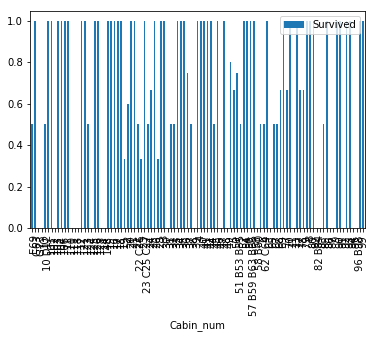

In [89]:
titanic_raw['Cabin_num'] = titanic_raw.Cabin.str[1:]
print(titanic_raw[['Survived', 'Cabin_num']].dropna().groupby('Cabin_num').size().sort_values(ascending=False)[:20])
titanic_raw[['Survived', 'Cabin_num']].dropna().groupby('Cabin_num').mean().plot.bar();
# needs more cleaning?

### Embarked

Embarked
C    168
Q     77
S    646
dtype: int64


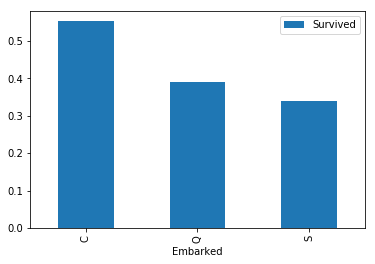

In [77]:
print(titanic[['Survived', 'Embarked']].dropna().groupby('Embarked').size())
titanic[['Survived', 'Embarked']].dropna().groupby('Embarked').mean().plot.bar();

Embarked
C    168
Q     77
S    646
dtype: int64


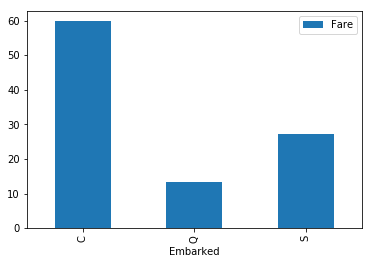

In [79]:
print(titanic[['Fare', 'Embarked']].dropna().groupby('Embarked').size())
titanic[['Fare', 'Embarked']].dropna().groupby('Embarked').mean().plot.bar();

## Overall Summary 

From your own exploration of the data, provide a few paragraphs in summary of the dataset. At this point, it may be helpful to provide a narrative which can reconstruct the situation aboard the titanic as it was sinking. This is also an opportunity to direct your attention towards areas where you feel information is raw and can be improved in your next section, through feature engineering.

# 3. Model Interpretation and Feature Engineering

In this section, we will begin by learning to appreciate the model interpretation methods related to decision trees and random forests. Then, we will move on to do some feature engineering - hopefully this will give us some information with respect to the dataset.

## Model Interpretation

### Feature importance
Plot a graph/table of feature importance of variables. Is there anything to be expected out of the data? Is there anything unexpected? Compare these findings with your teammate - are there any major differences in these plots?

By the way, does the PassengerId column end up significant for you? Does that make sense?

In [ ]:
feature_importances = pd.DataFrame(rf_initial.feature_importances_,index = X_train.columns, columns=['importance'])\
    .sort_values('importance',ascending=False)
feature_importances

### Partial Dependence 

Another useful interpretation plot is partial dependence. `sklearn.ensemble` has a `plot_partial_dependence` library, but another great option is `pdpbox`. 

Todo: attempt partial dependence on this - does it even work?

https://www.kaggle.com/dansbecker/partial-dependence-plots

Explore partial dependence plots on your datasets. Confirm if these plots corrobate with the insights you achieved from data exploration. Identity new insights which you previously did not observe. Present a paragraph of your thoughts on your model's interpretation.

## Feature Engineering 

In this section, you should first briefly explain your thought process - what is good, what is lacking, and what are the potential areas of information the model has yet to exploit. Following which, do some feature engineering. After every engineered feature, re-run your model and observe if there is an improvement in scores.

Running your feature importance again at different points in time can help to validate if your variables are truly important, or are they simply collinear.


<font color=red>Checkpoint: you should know how to manipulate pandas columns, such as using lambdas.</font>

In [ ]:
titanic['lastname'] = titanic['Name'].apply(lambda x: x.split(',')[0])
titanic.head()

# 4. Model Re-Training and Fine-Tuning

## Model Re-Training

When you are confident of your variables, re-run your model with all your variables again, and observe your feature importance. At times having extra variables may even deprove scores. You may also wish to remove features that show insignificant partial dependence. 

How much accuracy did these engineered features give? How important were these features? At this point in time, you may wish to talk to your peers and identify features they came up with (original ones, not those taken from the internet). This is a stage where brainstorming and contextual knowledge is extremely helpful.

## Model Tuning

Finally, we should do some model tuning. We previously ran a "default" model, with no customization inside our RandomForestClassifier model. However, if we were to look at the parameters, we'll see that there are many you can change.

In [ ]:
RandomForestClassifier().get_params()

Evidently, there are many variables worth checking out. For now, some of the most salient ones are `max_depth`, `max_leaf_nodes`, `max_features` and `n_estimators`. These are in general, all parameters we tweak to decrease overfitting. Try tuning these parameters, plotting a graph of model accuracy against parameter variation for each variable.

Other useful parameters are `oob_score`, which serves as a validation set of unsampled data points during the bootstrap, and `n_jobs`, which parallelises the process. We recommend you set `oob_score` to `True` (and use the oob_score as a metric), and `n_jobs` to `-1` to speed up your training process.
<br /><br />
<font color=red>This is not a prerequisite per se, but at this point, you should try to understand the bootstrapping concept. After all, this single concept gave rise to random forests and many other statistical methods we know today!</font>

### Subsampling 

The `fastai` library has a very cool method called `set_rf_samples`, which sets the number of subsamples we use in each tree we initalize. For more information, you may refer [here on stackoverflow](https://stackoverflow.com/questions/44955555/how-can-i-set-sub-sample-size-in-random-forest-classifier-in-scikit-learn-espec). You might wish to play with this variable, as it can give you some improved performance.

### Cross Validation (Optional)

If we think about what we do with validation, we're actually taking a portion (20%) of our data out of our training set for validation purposes. This means that we are sacrificing training data (and hence predictive power) to create a less overfitted, more generalised model. There is a trade-off for our model: we remove overfitting (variance) by sacrificing predictive power (increasing bias). This is known as the bias variance trade-off, which we will go into more detail next week.

We will go into details next week, but in short, this can be avoided using cross validation. If you have done this before, you may use cross validation to improve the model here. Report your accuracy.

Otherwise, if we know all the validation scores for all our models, simply pick the best model in terms of validation score. Report your accuracy. 

Put back all our data into one big training set, and re-train the model using this training set. You can now make a prediction on your test set, and submit your result to Kaggle!

### Submission

What is your Kaggle leaderboard performance? Please provide your Kaggle username as well. Our expectation: at least 82%.

In [ ]:
# Accuracy: ___
# Kaggle name: _____

# 5. Building your Random Forest from Scratch

Congratulations! You have completed the tutorial on random forests... not!

Apart from modelling, each week, you will also be expected to implement the models we are using. After all, the best way to learn is to implement from scratch. AI Apprentices are not only expected to model, but also do the necessary engineering for real life problems, and many such problems require custom code. For example, we may want to use subsampling to improve our model performance, but edge-cutting methods would not yet be available in common libraries. When this happens - and believe us, it almost certainly will, you will have to address these problems yourself.

Numerical programming might be new to some, if you did not come from the R/Matlab side of things. To get yourself up to speed with numerical programming in Python, we highly recommend Wes McKinney's [Python for Data Analysis, 2nd Ed.](https://www.safaribooksonline.com/library/view/python-for-data/9781491957653/)

### Structure TBC, but solutions are found in /src.

## Decision Trees 

A random forest, as the the name suggests, is made up of many decision trees, each with levels of variation and randomness. Before looking at random forests, we will look at understanding what decision trees do.

Decision trees, more specifically Classification and Regression Trees (CARTs), are an algorithm/data structure that learns to split data out based on rules it learns. There are many resources out there to get a good understanding of what CARTs are, which you may wish to reference while accomplishing the tasks here.

### Gini Criterion

If you remember from `get_params`, there exists a parameter `criterion: 'gini'`. This means that the tree is using Gini as a criterion to decide how to separate the data.

Hence, we will first learn how to use the Gini impurity score. The Gini impurity score of a node n is given as:  

<center>$i(n) = 1 - p^2_0 - p^2_1$,  </center>  

Where $p_1$ refers to the proportion of 1's in that node, and $p_0$ refers to the proportion of 0's.

In [ ]:
from src.decision_tree import DecisionTree
# for the above line of code to work,
# 1. create a folder called src if you haven't done so
# 2. create a __init__.py empty file in the folder 
# -> (see http://mikegrouchy.com/blog/2012/05/be-pythonic-__init__py.html)
# 3. create decision_tree.py
# 4. create a class DecisionTree

In [ ]:
def approx_eq(a, b, num_sig=5):
    return round(a, num_sig) == round(b, num_sig)

In [ ]:
approx_eq(DecisionTree().gini([1, 0, 0, 0, 0], [1, 1, 1, 1, 0]), .32)
# for the above line of code to work,
# 1. create a method gini that takes in 2 arrays and computes the node's gini impurity
# 2. implement the method as per the mathematical formula given
# 3. if you would like to turn this into a private method, make the necessary adjustments
# -> DecisionTree()._DecisionTree__gini()

### fit(X_train, y_train)

Following sklearn's `fit` and `predict`/`score` approach to programming, we will be implementing the fit and predict methods. First, we will attempt to implement a fit method.

The fit method will take in 2 numpy matrices: a m\*n train array with m training examples of n features, and a m\*1 array of labels.

There are tons of resources available to describe the workings of a CART. We would encourage you to find a source that best suits your needs, but we have picked out two points which other resources may miss at the implementation stage. Feel free to find more resources to expand on these areas:

1. The CART is a recursive tree structure. Every node of the tree can be seen as a decision tree node. When it splits, its left and right branches and its child nodes. When fitting a tree, you should recursively fit the nodes of the tree, in a way that the fitting can be used to predict in the future.

2. In finding the best condition to split the variables, it is alright to iterate through every single unique value of every variable, and determine the best condition through the iterations. The best condition can be defined as the one that provides the most __information gain__, which is defined as the greatest loss in Gini impurity.

If this is your first time doing object oriented programming in Python, we would high recommend you expose yourself to some Python resources first, or read the Python documentation. __If you need more help with these methods, ask a peer with programming experience, or you can seek help from the team.__

In [ ]:
# read a new csv and remove complicated columns
titanic = pd.read_csv('data/titanic.csv')
X_cols = titanic.columns
X_cols = X_cols.drop('Age')
X_cols = X_cols.drop('Cabin')
X_cols = X_cols.drop('Name')
X_cols = X_cols.drop('Ticket')
titanic = titanic[X_cols]

# one hot encoding for remainining multiclass columns
titanic['Sex_m'] = (titanic['Sex'] == 'male').astype('int')
titanic['Embarked_S'] = (titanic['Embarked'] == 'S').astype('int')
titanic['Embarked_C'] = (titanic['Embarked'] == 'C').astype('int')
titanic = titanic.drop(['Sex', 'Embarked'], axis=1)

# create X and y, test and train
X_cols = titanic.columns
X_cols = X_cols.drop('Survived')
X_titanic = titanic[X_cols]
y_titanic = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic, random_state=99)

In [ ]:
dt = DecisionTree()

In [ ]:
dt.fit(X_train.values, y_train.values)

### predict(X_test)

If you have designed your `fit` method well, predict method will be naturally easy. If the node is a leaf, simply return the leaf value. If the node is not a leaf, call predict on one of its child nodes depending on whether it fits the condition.

__If you need more help with these methods, ask a peer with programming experience, or you can seek help from the team.__

In [ ]:
preds_dt = dt.predict(X_test.values)
sum(preds_dt == y_test)/len(y_test)

## Random Forests

Now that we have a decision tree, we can build a random forest, comprising of decision trees of randomised bootstraps of our dataset. At the simplest level, a random forest can be simply a list of decision trees that take a vote on the outcome of the prediction. This list can be an attribute of the random forest.

The basic modification of random forests is the use of bootstrapping. Bootstrapping is done in a few lines of code through `np.random.choice`.

Hence, to begin, build a simple random forest, that will initialise 5 trees through bootstrapping (sampling 100% with replacement), and predict the answer through a voting mechanism out of all the 5 trees. For computational efficiency, we recommend using `np.stack` and `np.array.mean`.

In [ ]:
rf_0 = RandomForest()
rf_0.fit(X_train.values, y_train.values)
preds_rf = rf_0.predict(X_test.values)
sum(preds_rf == y_test)/len(y_test)

Next, we will implement `n_trees` to be tweakable. In addition, we will have a `subsample_size` parameter, which does the subsampling that the sklearn's random forest could not do. We can continue to use `np.random.choice`, but if subsample_size > 1, we can sample without replacement instead. (Or you could have another parameter to adjust that too.)

In [ ]:
rf_1 = RandomForest(n_trees=10, subsample_size=0.8)
rf_1.fit(X_train.values, y_train.values)
preds_rf1 = rf_1.predict(X_test.values)
sum(preds_rf1 == y_test)/len(y_test)

Finally, we will implement the `feature_proportion` feature, which refers to the number of features we allow each tree to use. This further increases the randomness and eliminates overfitting.

In [ ]:
rf_2 = RandomForest(n_trees=100, subsample_size=0.5, feature_proportion=0.5)
rf_2.fit(X_train.values, y_train.values)
preds_rf2 = rf_2.predict(X_test.values)
sum(preds_rf2 == y_test)/len(y_test)

You may wish to attempt to implement other optional parameters of random forest. One important parameter is `max_features` which makes the tree lose some features at every node, or `max_depth`, which limits the number of levels the tree can have. However, we chose to leave these out, as they require tweaking at the decision tree level, which is an exercise left for your own choice.

__Congratulations!__ You have finally come to the end of the week 1. Hope you had as much fun as we had building it!